<a href="https://colab.research.google.com/github/namratadeka/cs533-hw2/blob/master/assignment2_preliminaries.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Assignment 2, Preliminaries 

Turn the following expressions into tensor operations, replace any python for loop. Print the output and compare it to the sequential computation. 

**Hint:** Make yourself familiar with the following operations: ```torch.abs, torch.sum, torch.mean, torch.exp, torch.sqrt, torch.linspace, torch.meshgrid``` and ```tensor.permute, tensor.repeat, tensor.unsqueeze```, where tensor is a ```torch.tensor```.

In [1]:
# imports (nothing to do here)
import torch
import math
import matplotlib.pyplot as plt
prediction = torch.tensor([0.2,0.5,-1,0.9,5],dtype=torch.float)
label      = torch.tensor([0.19,0.4,-1.1,0.9,4.99],dtype=torch.float)

### Mean absolute error (MAE) computation

In [2]:
MAE = 0
for i in range(len(prediction)):
    MAE += torch.abs(prediction[i]-label[i])
MAE /= len(prediction)
print(MAE)

tensor(0.0440)


In [3]:
# tensor SOLUTION
MAE = torch.mean(torch.abs(label - prediction))
print(MAE)

tensor(0.0440)


### Mean squared error 

In [4]:
MSE = 0
for i in range(len(prediction)):
    MSE += (prediction[i]-label[i])**2
MSE /= len(prediction)
print(MSE)

tensor(0.0040)


In [5]:
# tensor SOLUTION
MSE = torch.mean((prediction - label)**2)
print(MSE)

tensor(0.0040)


### 1D polynomial evaluation

In [6]:
a = 0.1
b = 2
c = 0.5
f_of_x = []
x_list = torch.linspace(0,1,8)
for x in x_list:
    f_of_x.append(a + b*x + c*(x**2))
f_of_x = torch.FloatTensor(f_of_x)
print(f_of_x)

tensor([0.1000, 0.3959, 0.7122, 1.0490, 1.4061, 1.7837, 2.1816, 2.6000])


In [7]:
# tensor SOLUTION
f_of_x = a + b*x_list + c*(x_list**2)
print(f_of_x)

tensor([0.1000, 0.3959, 0.7122, 1.0490, 1.4061, 1.7837, 2.1816, 2.6000])


### 2D Gaussian function

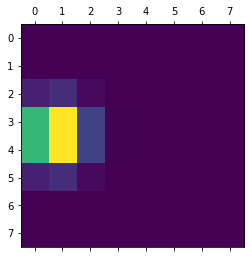

In [8]:
mu_x = 0.1
mu_y = 0.5
sigma = 0.1
x_list = torch.linspace(0,1,8)
y_list = torch.linspace(0,1,8)
f_of_x = torch.FloatTensor(8,8)
for i,x in enumerate(x_list):
    for j,y in enumerate(y_list):
        d = (x-mu_x)**2 + (y-mu_y)**2
        c = 1/math.sqrt(2*math.pi)
        f_of_x[j,i] = c*torch.exp(-d/(2*sigma**2))
plt.matshow(f_of_x)

tensor([[9.0174e-07, 1.3563e-06, 2.6503e-07, 6.7286e-09, 2.2194e-11, 9.5114e-15,
         5.2958e-19, 3.8309e-24],
        [4.1118e-04, 6.1843e-04, 1.2085e-04, 3.0681e-06, 1.0120e-08, 4.3370e-12,
         2.4148e-16, 1.7468e-21],
        [2.4359e-02, 3.6637e-02, 7.1593e-03, 1.8176e-04, 5.9954e-07, 2.5693e-10,
         1.4306e-14, 1.0349e-19],
        [1.8749e-01, 2.8199e-01, 5.5104e-02, 1.3990e-03, 4.6146e-06, 1.9776e-09,
         1.1011e-13, 7.9652e-19],
        [1.8749e-01, 2.8199e-01, 5.5104e-02, 1.3990e-03, 4.6146e-06, 1.9776e-09,
         1.1011e-13, 7.9652e-19],
        [2.4359e-02, 3.6637e-02, 7.1593e-03, 1.8176e-04, 5.9954e-07, 2.5693e-10,
         1.4306e-14, 1.0349e-19],
        [4.1118e-04, 6.1843e-04, 1.2085e-04, 3.0681e-06, 1.0120e-08, 4.3370e-12,
         2.4148e-16, 1.7468e-21],
        [9.0174e-07, 1.3563e-06, 2.6503e-07, 6.7286e-09, 2.2194e-11, 9.5114e-15,
         5.2958e-19, 3.8309e-24]])

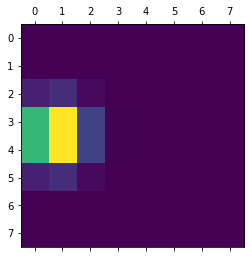

In [12]:
# tensor SOLUTION
c = 1/math.sqrt(2*math.pi)
d = ((x_list-mu_x)**2).unsqueeze(0) + ((y_list-mu_y)**2).unsqueeze(-1)
f_of_x = c * torch.exp(-d/(2*sigma**2))
plt.matshow(f_of_x)
f_of_x

Finally, use GPU computation (requires to run on a cuda capable machine with cuda installed) to turn the same operation on the GPU. Simply update your solution in the cell above. Compare the CPU and GPU output, is it the same? Up to what precision?

tensor([[9.0174e-07, 1.3563e-06, 2.6503e-07, 6.7286e-09, 2.2194e-11, 9.5114e-15,
         5.2958e-19, 3.8309e-24],
        [4.1118e-04, 6.1843e-04, 1.2085e-04, 3.0681e-06, 1.0120e-08, 4.3370e-12,
         2.4148e-16, 1.7468e-21],
        [2.4359e-02, 3.6637e-02, 7.1593e-03, 1.8176e-04, 5.9954e-07, 2.5693e-10,
         1.4306e-14, 1.0349e-19],
        [1.8749e-01, 2.8199e-01, 5.5104e-02, 1.3990e-03, 4.6146e-06, 1.9776e-09,
         1.1011e-13, 7.9652e-19],
        [1.8749e-01, 2.8199e-01, 5.5104e-02, 1.3990e-03, 4.6146e-06, 1.9776e-09,
         1.1011e-13, 7.9652e-19],
        [2.4359e-02, 3.6637e-02, 7.1593e-03, 1.8176e-04, 5.9954e-07, 2.5693e-10,
         1.4306e-14, 1.0349e-19],
        [4.1118e-04, 6.1843e-04, 1.2085e-04, 3.0681e-06, 1.0120e-08, 4.3370e-12,
         2.4148e-16, 1.7468e-21],
        [9.0174e-07, 1.3563e-06, 2.6503e-07, 6.7286e-09, 2.2194e-11, 9.5114e-15,
         5.2958e-19, 3.8309e-24]], device='cuda:0')

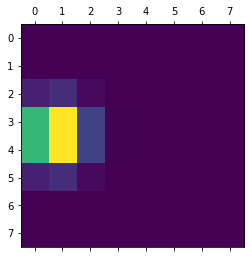

In [13]:
# SOLUTION
# tensor SOLUTION
c = 1/math.sqrt(2*math.pi)
d = ((x_list.cuda()-mu_x)**2).unsqueeze(0) + ((y_list.cuda()-mu_y)**2).unsqueeze(-1)
f_of_x = c * torch.exp(-d/(2*sigma**2))
plt.matshow(f_of_x.cpu().numpy())
f_of_x